In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
# the dataset contain the following features

list(data.feature_names)

[np.str_('mean radius'),
 np.str_('mean texture'),
 np.str_('mean perimeter'),
 np.str_('mean area'),
 np.str_('mean smoothness'),
 np.str_('mean compactness'),
 np.str_('mean concavity'),
 np.str_('mean concave points'),
 np.str_('mean symmetry'),
 np.str_('mean fractal dimension'),
 np.str_('radius error'),
 np.str_('texture error'),
 np.str_('perimeter error'),
 np.str_('area error'),
 np.str_('smoothness error'),
 np.str_('compactness error'),
 np.str_('concavity error'),
 np.str_('concave points error'),
 np.str_('symmetry error'),
 np.str_('fractal dimension error'),
 np.str_('worst radius'),
 np.str_('worst texture'),
 np.str_('worst perimeter'),
 np.str_('worst area'),
 np.str_('worst smoothness'),
 np.str_('worst compactness'),
 np.str_('worst concavity'),
 np.str_('worst concave points'),
 np.str_('worst symmetry'),
 np.str_('worst fractal dimension')]

In [5]:
# the dataset contain the following labels

data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
# Getting features and labels

X = data.data
y = data.target

In [7]:
# the features and labels are numpy array

type(X)

numpy.ndarray

In [8]:
# To quickly look in data we can get the dataframe from X

data_df = pd.DataFrame(X, columns=data.feature_names)

In [9]:
# Looking from the head

data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Getting the basic information

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# Getting the basic stats

data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=42)

In [13]:
print('The number of training samples: {}\nThe number of testing samples: {}'.format(X_train.shape[0], X_test.shape[0]))

The number of training samples: 455
The number of testing samples: 114


In [14]:
# Scaling the features to be between 0 and 1.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

In [15]:
X_test_scaled = scaler.transform(X_test)

In [17]:
# Creating a model

# Getting the input shape

input_shape = X_train_scaled.shape[1:]

model_1 = tf.keras.models.Sequential([

              # The first layer has 30 neurons(or units)
              tf.keras.layers.Dense(units=30, input_shape=input_shape, activation='relu'),

              # The second layer has 25 neurons

              tf.keras.layers.Dense(units=15, activation='relu'),

              # The third layer has 1 neuron and activation of sigmoid.
              # Because of sigmoid, the output of this layer will be a value bwteen 0 and 1
              tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compiling the model

model_1.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# By setting validation_split=0.15, I am allocating 15% of the dataset to be used for evaluating the model during the training
# Model training returns model history(accuracy, loss, epochs...)

history = model_1.fit(X_train_scaled, y_train, epochs=60, validation_split=0.15)

Epoch 1/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3785 - loss: 0.6784 - val_accuracy: 0.3623 - val_loss: 0.6709
Epoch 2/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3792 - loss: 0.6711 - val_accuracy: 0.4638 - val_loss: 0.6590
Epoch 3/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5236 - loss: 0.6563 - val_accuracy: 0.6667 - val_loss: 0.6504
Epoch 4/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6792 - loss: 0.6501 - val_accuracy: 0.8696 - val_loss: 0.6422
Epoch 5/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7873 - loss: 0.6421 - val_accuracy: 0.9275 - val_loss: 0.6337
Epoch 6/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8868 - loss: 0.6353 - val_accuracy: 0.9275 - val_loss: 0.6263
Epoch 7/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9231 - loss: 0.6257 - val_accuracy: 0.8841 - val_loss: 0.6197
Epoch 8/60
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8937 - loss: 0.6204 - val_accuracy: 0.8696 - val_los

<Axes: >

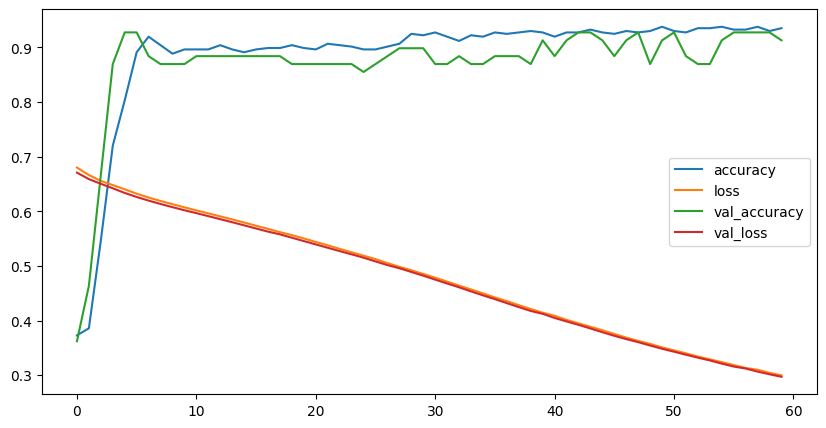

In [19]:
# Getting the dataframe of loss and accuracies on both training and validation

loss_acc_metrics_df = pd.DataFrame(history.history)
loss_acc_metrics_df.plot(figsize=(10,5))

In [20]:
# Evaluating a model on unseen data: test set

model_eval = model_1.evaluate(X_test_scaled, y_test)

# Printing the loss and accuracy

print('Test loss: {}\nTest accuracy:{}'.format(model_eval[0],model_eval[1]))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9595 - loss: 0.2625
Test loss: 0.2698199450969696
Test accuracy:0.9561403393745422


In [21]:
# ‼DON'T DO THIS!! X_test is not scaled. The results will be awful

model_1.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3623 - loss: 542.7354


[533.4309692382812, 0.37719297409057617]

In [22]:
# Getting the prediction

predictions = model_1.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [23]:
# Rounding the predictions to 0 and 1

predictions = tf.round(predictions)

In [24]:
 # Display the first 15 preds values

predictions[:15]

<tf.Tensor: shape=(15, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

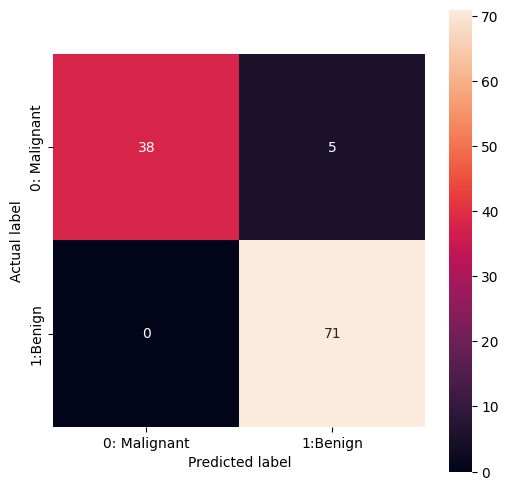

In [25]:
# Getting the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

# Plotting confusion matrix

plt.figure(figsize=(6,6))
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                        xticklabels=['0: Malignant', '1:Benign'],
                        yticklabels=['0: Malignant', '1:Benign'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label');